In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "serif"

In [28]:
# Data
methods = [
    'No\naugmentation', 
    'SaliencyMix\n(Original)', 
    'SaliencyMix\n(Fixed)'
]
top1_errors = np.array([
    [34, 34, 34],   # Dummies
    [33.16, 33.38, 33.01],
    [33.85, 33.14, 34.65],
])
top5_errors = np.array([
    [15, 16, 15],   # Dummies
    [13.16, 13.28, 13.08],
    [14.11, 13.44, 14.41],
])

# Compute stats
top1_err_avg = np.average(top1_errors, axis=1)
top5_err_avg = np.average(top5_errors, axis=1)
top1_err_rng = np.stack((
    top1_err_avg - np.min(top1_errors, axis=1), 
    np.max(top1_errors, axis=1) - top1_err_avg
))
top5_err_rng = np.stack((
    top5_err_avg - np.min(top5_errors, axis=1), 
    np.max(top5_errors, axis=1) - top5_err_avg
))


<ErrorbarContainer object of 3 artists>

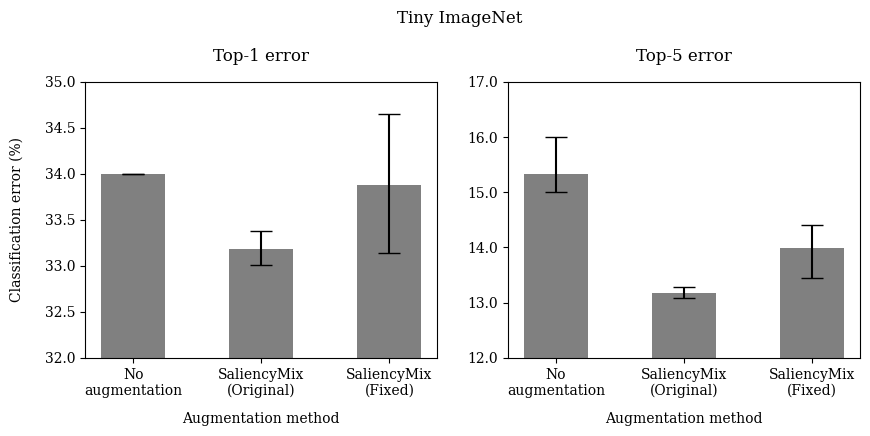

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(top=0.8)
fig.suptitle('Tiny ImageNet')

ax1.set_title('Top-1 error', pad=15)
ax1.set_xlabel('Augmentation method', labelpad=10)
ax1.set_ylabel('Classification error (%)', labelpad=15)
ax1.set_ylim(bottom=32, top=35)
ax1.yaxis.set_major_formatter('{x:.1f}')
ax1.bar(
    methods, top1_err_avg, width=0.5, color='grey'
)
ax1.errorbar(
    np.arange(len(methods)), top1_err_avg, 
    yerr=top1_err_rng, ls='', color='black', capsize=8
)

ax2.set_title('Top-5 error', pad=15)
ax2.set_xlabel('Augmentation method', labelpad=10)
ax2.set_ylim(bottom=12, top=17)
ax2.yaxis.set_major_formatter('{x:.1f}')
ax2.bar(
    methods, top5_err_avg, width=0.5, color='grey'
)
ax2.errorbar(
    np.arange(len(methods)), top5_err_avg, 
    yerr=top5_err_rng, ls='', color='black', capsize=8
)